In [ ]:
!pip install tensorflow==2.0.0-alpha # for colab

In [24]:
# from https://www.tensorflow.org/tutorials/keras/basic_text_classification

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 400

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')

print('Pad sequences (samples x time)')
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

print(train_data[0])
print(test_data[0])


Loading data...


25000 train sequences
25000 test sequences
Pad sequences (samples x time)


train_data shape: (25000, 400)
test_data shape: (25000, 400)


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4 

In [25]:

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

train_data = pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)
test_data = pad_sequences(test_data, 
                                                       value=word_index["<PAD>"], 
                                                       padding='post',
                                                       maxlen=256)


print(len(train_data[0]), len(train_data[1]))


In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, \
    Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Embedding
from tensorflow.nn import relu, sigmoid
from tensorflow.keras.backend import binary_crossentropy


# set parameters:
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250




# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, 16))
#model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
#model.add(Dropout(0.2))
#model.add(Conv1D(filters, kernel_size, padding='valid', activation=relu, strides=1))
#model.add(GlobalMaxPooling1D())
model.add(GlobalAveragePooling1D())
#model.add(Dense(250, activation=relu))
#model.add(Dropout(0.2))
model.add(Dense(16, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.summary()

model.compile(optimizer='adam',
              loss=binary_crossentropy,
              metrics=['acc']
              )


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [27]:
partial_validation_data = train_data[:10000]
partial_train_data = train_data[10000:]

partial_validation_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

In [28]:
batch_size = 512 # 32
epochs=40 # 2

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(partial_validation_data, partial_validation_labels),
                    verbose=1)
# history = model.fit(test_data, test_labels, batch_size=batch_size, epochs=epochs, verbose=1)
model.evaluate(test_data, test_labels)

Train on 15000 samples, validate on 10000 samples


Epoch 1/40
  512/15000 [>.............................] - ETA: 4s - loss: 0.6932 - acc: 0.4863

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.6931 - acc: 0.5065

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.6931 - acc: 0.5035

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.6931 - acc: 0.5098

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.6930 - acc: 0.5100

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.6930 - acc: 0.5086

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6930 - acc: 0.5049

 7168/15000 [=============>................] - ETA: 0s - loss: 0.6929 - acc: 0.5066

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6929 - acc: 0.5078

 9216/15000 [=================>............] - ETA: 0s - loss: 0.6928 - acc: 0.5090

10240/15000 [===================>..........] - ETA: 0s - loss: 0.6927 - acc: 0.5123

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6927 - acc: 0.5153

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6926 - acc: 0.5172

13312/15000 [=========================>....] - ETA: 0s - loss: 0.6925 - acc: 0.5199

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6925 - acc: 0.5201

15000/15000 [==============================] - 1s 94us/sample - loss: 0.6925 - acc: 0.5205 - val_loss: 0.6917 - val_acc: 0.5443


Epoch 2/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6910 - acc: 0.5684

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.6911 - acc: 0.5566

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6911 - acc: 0.5586

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6911 - acc: 0.5578

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6910 - acc: 0.5610

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6907 - acc: 0.5696

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6906 - acc: 0.5697

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.6905 - acc: 0.5685

 8704/15000 [================>.............] - ETA: 0s - loss: 0.6904 - acc: 0.5684

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6903 - acc: 0.5712

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6902 - acc: 0.5774

11776/15000 [======================>.......] - ETA: 0s - loss: 0.6900 - acc: 0.5891

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6899 - acc: 0.5970

13824/15000 [==========================>...] - ETA: 0s - loss: 0.6897 - acc: 0.6050

14848/15000 [============================>.] - ETA: 0s - loss: 0.6895 - acc: 0.6117

15000/15000 [==============================] - 1s 72us/sample - loss: 0.6894 - acc: 0.6127 - val_loss: 0.6867 - val_acc: 0.6543


Epoch 3/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6862 - acc: 0.6543

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.6860 - acc: 0.6439

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6857 - acc: 0.6340

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6853 - acc: 0.6292

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6851 - acc: 0.6278

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6847 - acc: 0.6294

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6845 - acc: 0.6317

 7168/15000 [=============>................] - ETA: 0s - loss: 0.6841 - acc: 0.6327

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6838 - acc: 0.6377

 9216/15000 [=================>............] - ETA: 0s - loss: 0.6834 - acc: 0.6431

10240/15000 [===================>..........] - ETA: 0s - loss: 0.6828 - acc: 0.6508

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6825 - acc: 0.6569

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6820 - acc: 0.6645

13312/15000 [=========================>....] - ETA: 0s - loss: 0.6815 - acc: 0.6711

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6810 - acc: 0.6789

15000/15000 [==============================] - 1s 84us/sample - loss: 0.6806 - acc: 0.6823 - val_loss: 0.6744 - val_acc: 0.7339


Epoch 4/40
  512/15000 [>.............................] - ETA: 1s - loss: 0.6721 - acc: 0.7363

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.6714 - acc: 0.7428

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6707 - acc: 0.7297

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6706 - acc: 0.7121

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6698 - acc: 0.6986

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6695 - acc: 0.6884

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6694 - acc: 0.6776

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.6687 - acc: 0.6768

 8704/15000 [================>.............] - ETA: 0s - loss: 0.6678 - acc: 0.6810

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6673 - acc: 0.6831

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6666 - acc: 0.6884

11776/15000 [======================>.......] - ETA: 0s - loss: 0.6658 - acc: 0.6962

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6649 - acc: 0.7023

13824/15000 [==========================>...] - ETA: 0s - loss: 0.6641 - acc: 0.7076

14848/15000 [============================>.] - ETA: 0s - loss: 0.6634 - acc: 0.7104

15000/15000 [==============================] - 1s 70us/sample - loss: 0.6632 - acc: 0.7109 - val_loss: 0.6537 - val_acc: 0.7501


Epoch 5/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6514 - acc: 0.7578

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.6492 - acc: 0.7689

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6484 - acc: 0.7727

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6477 - acc: 0.7670

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6477 - acc: 0.7619

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6463 - acc: 0.7614

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6456 - acc: 0.7580

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.6445 - acc: 0.7589

 8704/15000 [================>.............] - ETA: 0s - loss: 0.6436 - acc: 0.7628

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6424 - acc: 0.7650

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6416 - acc: 0.7660

11776/15000 [======================>.......] - ETA: 0s - loss: 0.6404 - acc: 0.7677

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6389 - acc: 0.7684

13824/15000 [==========================>...] - ETA: 0s - loss: 0.6378 - acc: 0.7692

14848/15000 [============================>.] - ETA: 0s - loss: 0.6364 - acc: 0.7708

15000/15000 [==============================] - 1s 71us/sample - loss: 0.6363 - acc: 0.7709 - val_loss: 0.6244 - val_acc: 0.7751


Epoch 6/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6111 - acc: 0.8184

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.6155 - acc: 0.7982

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6156 - acc: 0.7949

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6144 - acc: 0.7921

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6139 - acc: 0.7912

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6120 - acc: 0.7939

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6107 - acc: 0.7930

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.6096 - acc: 0.7909

 8704/15000 [================>.............] - ETA: 0s - loss: 0.6090 - acc: 0.7908

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6076 - acc: 0.7922

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6059 - acc: 0.7943

11776/15000 [======================>.......] - ETA: 0s - loss: 0.6043 - acc: 0.7958

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6034 - acc: 0.7954

13824/15000 [==========================>...] - ETA: 0s - loss: 0.6021 - acc: 0.7952

14848/15000 [============================>.] - ETA: 0s - loss: 0.6005 - acc: 0.7957

15000/15000 [==============================] - 1s 72us/sample - loss: 0.6001 - acc: 0.7961 - val_loss: 0.5892 - val_acc: 0.7821


Epoch 7/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5952 - acc: 0.7715

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.5776 - acc: 0.8138

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.5766 - acc: 0.8121

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5762 - acc: 0.8066

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.5730 - acc: 0.8103

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.5722 - acc: 0.8081

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5708 - acc: 0.8077

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.5697 - acc: 0.8079

 8704/15000 [================>.............] - ETA: 0s - loss: 0.5681 - acc: 0.8099

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5662 - acc: 0.8098

10752/15000 [====================>.........] - ETA: 0s - loss: 0.5637 - acc: 0.8121

11776/15000 [======================>.......] - ETA: 0s - loss: 0.5620 - acc: 0.8122

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5604 - acc: 0.8125

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5596 - acc: 0.8126

14848/15000 [============================>.] - ETA: 0s - loss: 0.5578 - acc: 0.8140

15000/15000 [==============================] - 1s 71us/sample - loss: 0.5579 - acc: 0.8137 - val_loss: 0.5475 - val_acc: 0.8091


Epoch 8/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5336 - acc: 0.8105

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.5248 - acc: 0.8249

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.5257 - acc: 0.8250

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5283 - acc: 0.8251

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.5258 - acc: 0.8288

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.5254 - acc: 0.8271

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5238 - acc: 0.8280

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.5221 - acc: 0.8290

 8704/15000 [================>.............] - ETA: 0s - loss: 0.5215 - acc: 0.8287

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5200 - acc: 0.8300

10752/15000 [====================>.........] - ETA: 0s - loss: 0.5189 - acc: 0.8304

11776/15000 [======================>.......] - ETA: 0s - loss: 0.5176 - acc: 0.8311

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5163 - acc: 0.8314

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5152 - acc: 0.8324

14848/15000 [============================>.] - ETA: 0s - loss: 0.5139 - acc: 0.8333

15000/15000 [==============================] - 1s 70us/sample - loss: 0.5136 - acc: 0.8335 - val_loss: 0.5077 - val_acc: 0.8230


Epoch 9/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4844 - acc: 0.8398

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.4870 - acc: 0.8366

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.4816 - acc: 0.8500

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4815 - acc: 0.8504

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.4824 - acc: 0.8500

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.4811 - acc: 0.8493

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4807 - acc: 0.8480

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.4793 - acc: 0.8474

 8704/15000 [================>.............] - ETA: 0s - loss: 0.4771 - acc: 0.8481

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4752 - acc: 0.8480

10752/15000 [====================>.........] - ETA: 0s - loss: 0.4743 - acc: 0.8483

11776/15000 [======================>.......] - ETA: 0s - loss: 0.4741 - acc: 0.8483

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4722 - acc: 0.8502

13824/15000 [==========================>...] - ETA: 0s - loss: 0.4711 - acc: 0.8504

14848/15000 [============================>.] - ETA: 0s - loss: 0.4709 - acc: 0.8505

15000/15000 [==============================] - 1s 69us/sample - loss: 0.4706 - acc: 0.8508 - val_loss: 0.4702 - val_acc: 0.8360


Epoch 10/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4450 - acc: 0.8750

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.4414 - acc: 0.8665

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.4441 - acc: 0.8578

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4449 - acc: 0.8566

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.4430 - acc: 0.8607

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.4416 - acc: 0.8617

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4387 - acc: 0.8624

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.4375 - acc: 0.8618

 8704/15000 [================>.............] - ETA: 0s - loss: 0.4369 - acc: 0.8614

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4372 - acc: 0.8607

10752/15000 [====================>.........] - ETA: 0s - loss: 0.4356 - acc: 0.8622

11776/15000 [======================>.......] - ETA: 0s - loss: 0.4352 - acc: 0.8617

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4338 - acc: 0.8620

13824/15000 [==========================>...] - ETA: 0s - loss: 0.4323 - acc: 0.8632

14848/15000 [============================>.] - ETA: 0s - loss: 0.4312 - acc: 0.8631

15000/15000 [==============================] - 1s 69us/sample - loss: 0.4309 - acc: 0.8634 - val_loss: 0.4380 - val_acc: 0.8433


Epoch 11/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4002 - acc: 0.8770

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.4064 - acc: 0.8665

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.4080 - acc: 0.8641

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4065 - acc: 0.8650

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.4059 - acc: 0.8687

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.4062 - acc: 0.8699

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4047 - acc: 0.8703

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.4045 - acc: 0.8715

 8704/15000 [================>.............] - ETA: 0s - loss: 0.4030 - acc: 0.8704

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4032 - acc: 0.8697

10752/15000 [====================>.........] - ETA: 0s - loss: 0.4014 - acc: 0.8712

11776/15000 [======================>.......] - ETA: 0s - loss: 0.4005 - acc: 0.8713

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3988 - acc: 0.8724

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3979 - acc: 0.8726

14848/15000 [============================>.] - ETA: 0s - loss: 0.3961 - acc: 0.8732

15000/15000 [==============================] - 1s 68us/sample - loss: 0.3962 - acc: 0.8731 - val_loss: 0.4097 - val_acc: 0.8519


Epoch 12/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3710 - acc: 0.8926

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.3850 - acc: 0.8776

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.3831 - acc: 0.8785

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3774 - acc: 0.8814

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3752 - acc: 0.8798

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3764 - acc: 0.8778

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3755 - acc: 0.8801

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3745 - acc: 0.8802

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3736 - acc: 0.8786

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3714 - acc: 0.8798

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3696 - acc: 0.8814

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3687 - acc: 0.8811

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3683 - acc: 0.8813

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3668 - acc: 0.8818

14848/15000 [============================>.] - ETA: 0s - loss: 0.3667 - acc: 0.8811

15000/15000 [==============================] - 1s 68us/sample - loss: 0.3663 - acc: 0.8813 - val_loss: 0.3864 - val_acc: 0.8579


Epoch 13/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3421 - acc: 0.9023

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.3422 - acc: 0.8893

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.3442 - acc: 0.8859

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3428 - acc: 0.8850

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3407 - acc: 0.8861

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3448 - acc: 0.8826

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3436 - acc: 0.8860

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3424 - acc: 0.8870

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3425 - acc: 0.8865

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3419 - acc: 0.8874

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3403 - acc: 0.8881

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3411 - acc: 0.8875

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3397 - acc: 0.8875

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3399 - acc: 0.8871

14848/15000 [============================>.] - ETA: 0s - loss: 0.3403 - acc: 0.8871

15000/15000 [==============================] - 1s 69us/sample - loss: 0.3406 - acc: 0.8867 - val_loss: 0.3678 - val_acc: 0.8627


Epoch 14/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3229 - acc: 0.8984

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.3243 - acc: 0.8984

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.3226 - acc: 0.8953

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3233 - acc: 0.8940

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3230 - acc: 0.8939

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3232 - acc: 0.8928

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3243 - acc: 0.8921

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3222 - acc: 0.8922

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3207 - acc: 0.8927

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3205 - acc: 0.8928

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3186 - acc: 0.8937

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3187 - acc: 0.8931

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3185 - acc: 0.8934

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3180 - acc: 0.8937

14848/15000 [============================>.] - ETA: 0s - loss: 0.3180 - acc: 0.8943

15000/15000 [==============================] - 1s 69us/sample - loss: 0.3182 - acc: 0.8943 - val_loss: 0.3513 - val_acc: 0.8699


Epoch 15/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3084 - acc: 0.8965

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.3147 - acc: 0.8887

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.3152 - acc: 0.8914

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3078 - acc: 0.8954

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3043 - acc: 0.8965

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3074 - acc: 0.8951

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3043 - acc: 0.8969

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3048 - acc: 0.8956

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3051 - acc: 0.8951

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3059 - acc: 0.8949

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3046 - acc: 0.8953

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3039 - acc: 0.8960

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3026 - acc: 0.8977

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3017 - acc: 0.8984

14848/15000 [============================>.] - ETA: 0s - loss: 0.2999 - acc: 0.8998

15000/15000 [==============================] - 1s 68us/sample - loss: 0.2997 - acc: 0.8998 - val_loss: 0.3384 - val_acc: 0.8738


Epoch 16/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3034 - acc: 0.8828

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2982 - acc: 0.8939

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2958 - acc: 0.8984

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2934 - acc: 0.8976

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2907 - acc: 0.8993

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2880 - acc: 0.9036

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2856 - acc: 0.9046

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2854 - acc: 0.9044

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2852 - acc: 0.9050

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2830 - acc: 0.9058

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2832 - acc: 0.9057

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2841 - acc: 0.9047

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2837 - acc: 0.9048

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2829 - acc: 0.9054

14848/15000 [============================>.] - ETA: 0s - loss: 0.2834 - acc: 0.9052

15000/15000 [==============================] - 1s 68us/sample - loss: 0.2828 - acc: 0.9056 - val_loss: 0.3279 - val_acc: 0.8758


Epoch 17/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2750 - acc: 0.9023

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2912 - acc: 0.8906

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2769 - acc: 0.9004

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2780 - acc: 0.9007

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2757 - acc: 0.9041

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2761 - acc: 0.9048

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2753 - acc: 0.9046

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2741 - acc: 0.9066

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2730 - acc: 0.9066

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2712 - acc: 0.9070

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2706 - acc: 0.9069

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2699 - acc: 0.9076

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2692 - acc: 0.9079

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2683 - acc: 0.9088

14848/15000 [============================>.] - ETA: 0s - loss: 0.2679 - acc: 0.9094

15000/15000 [==============================] - 1s 68us/sample - loss: 0.2675 - acc: 0.9097 - val_loss: 0.3193 - val_acc: 0.8793


Epoch 18/40
  512/15000 [>.............................] - ETA: 1s - loss: 0.2429 - acc: 0.9277

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2450 - acc: 0.9212

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2556 - acc: 0.9176

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2584 - acc: 0.9149

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2564 - acc: 0.9164

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2583 - acc: 0.9135

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2567 - acc: 0.9133

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2560 - acc: 0.9128

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2562 - acc: 0.9128

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2574 - acc: 0.9119

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2565 - acc: 0.9127

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2568 - acc: 0.9124

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2561 - acc: 0.9131

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2548 - acc: 0.9138

14848/15000 [============================>.] - ETA: 0s - loss: 0.2545 - acc: 0.9139

15000/15000 [==============================] - 1s 69us/sample - loss: 0.2544 - acc: 0.9140 - val_loss: 0.3121 - val_acc: 0.8801


Epoch 19/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2487 - acc: 0.9199

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2530 - acc: 0.9173

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2524 - acc: 0.9129

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2497 - acc: 0.9169

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2519 - acc: 0.9154

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2452 - acc: 0.9189

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2417 - acc: 0.9201

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2418 - acc: 0.9187

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2439 - acc: 0.9180

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2402 - acc: 0.9199

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2393 - acc: 0.9205

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2410 - acc: 0.9197

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2415 - acc: 0.9185

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2430 - acc: 0.9174

14848/15000 [============================>.] - ETA: 0s - loss: 0.2422 - acc: 0.9175

15000/15000 [==============================] - 1s 69us/sample - loss: 0.2422 - acc: 0.9177 - val_loss: 0.3059 - val_acc: 0.8818


Epoch 20/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2342 - acc: 0.9238

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2345 - acc: 0.9238

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2328 - acc: 0.9270

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2332 - acc: 0.9235

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2375 - acc: 0.9197

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2343 - acc: 0.9201

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2350 - acc: 0.9190

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2344 - acc: 0.9191

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2313 - acc: 0.9211

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2310 - acc: 0.9214

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2314 - acc: 0.9207

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2311 - acc: 0.9204

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2326 - acc: 0.9196

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2333 - acc: 0.9195

14848/15000 [============================>.] - ETA: 0s - loss: 0.2324 - acc: 0.9201

15000/15000 [==============================] - 1s 68us/sample - loss: 0.2321 - acc: 0.9202 - val_loss: 0.3013 - val_acc: 0.8837


Epoch 21/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2102 - acc: 0.9336

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2197 - acc: 0.9284

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2185 - acc: 0.9309

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2201 - acc: 0.9308

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2211 - acc: 0.9297

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2202 - acc: 0.9288

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2197 - acc: 0.9295

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2193 - acc: 0.9285

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2191 - acc: 0.9291

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2186 - acc: 0.9291

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2204 - acc: 0.9275

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2201 - acc: 0.9280

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2205 - acc: 0.9280

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2200 - acc: 0.9283

14848/15000 [============================>.] - ETA: 0s - loss: 0.2209 - acc: 0.9269

15000/15000 [==============================] - 1s 68us/sample - loss: 0.2208 - acc: 0.9267 - val_loss: 0.2970 - val_acc: 0.8851


Epoch 22/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2033 - acc: 0.9414

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2114 - acc: 0.9323

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2204 - acc: 0.9266

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2126 - acc: 0.9289

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2129 - acc: 0.9293

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2095 - acc: 0.9300

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2098 - acc: 0.9310

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2126 - acc: 0.9284

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2120 - acc: 0.9296

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2120 - acc: 0.9297

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2126 - acc: 0.9289

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2136 - acc: 0.9282

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2125 - acc: 0.9290

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2124 - acc: 0.9289

14848/15000 [============================>.] - ETA: 0s - loss: 0.2118 - acc: 0.9296

15000/15000 [==============================] - 1s 69us/sample - loss: 0.2119 - acc: 0.9297 - val_loss: 0.2933 - val_acc: 0.8841


Epoch 23/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2102 - acc: 0.9355

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2043 - acc: 0.9329

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2036 - acc: 0.9320

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2031 - acc: 0.9302

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2000 - acc: 0.9325

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2008 - acc: 0.9338

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1993 - acc: 0.9348

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2008 - acc: 0.9324

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1998 - acc: 0.9331

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2021 - acc: 0.9317

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2041 - acc: 0.9303

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2034 - acc: 0.9310

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2039 - acc: 0.9311

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2025 - acc: 0.9323

14848/15000 [============================>.] - ETA: 0s - loss: 0.2026 - acc: 0.9319

15000/15000 [==============================] - 1s 68us/sample - loss: 0.2027 - acc: 0.9318 - val_loss: 0.2917 - val_acc: 0.8849


Epoch 24/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1839 - acc: 0.9277

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1804 - acc: 0.9382

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1877 - acc: 0.9367

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1939 - acc: 0.9339

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1966 - acc: 0.9329

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1976 - acc: 0.9325

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1973 - acc: 0.9327

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1970 - acc: 0.9320

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1991 - acc: 0.9312

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1973 - acc: 0.9327

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1971 - acc: 0.9328

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1962 - acc: 0.9333

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1960 - acc: 0.9336

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1951 - acc: 0.9340

14848/15000 [============================>.] - ETA: 0s - loss: 0.1955 - acc: 0.9335

15000/15000 [==============================] - 1s 68us/sample - loss: 0.1951 - acc: 0.9337 - val_loss: 0.2886 - val_acc: 0.8885


Epoch 25/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1898 - acc: 0.9395

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1876 - acc: 0.9440

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1820 - acc: 0.9430

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1814 - acc: 0.9422

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1830 - acc: 0.9431

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1844 - acc: 0.9423

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1835 - acc: 0.9423

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1847 - acc: 0.9413

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1860 - acc: 0.9403

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1850 - acc: 0.9395

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1856 - acc: 0.9386

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1863 - acc: 0.9389

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1874 - acc: 0.9373

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1865 - acc: 0.9382

14848/15000 [============================>.] - ETA: 0s - loss: 0.1868 - acc: 0.9379

15000/15000 [==============================] - 1s 68us/sample - loss: 0.1869 - acc: 0.9380 - val_loss: 0.2863 - val_acc: 0.8886


Epoch 26/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1581 - acc: 0.9414

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1782 - acc: 0.9349

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1790 - acc: 0.9371

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1826 - acc: 0.9392

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1843 - acc: 0.9382

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1867 - acc: 0.9371

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1858 - acc: 0.9378

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1854 - acc: 0.9382

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1845 - acc: 0.9380

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1837 - acc: 0.9390

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1823 - acc: 0.9404

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1819 - acc: 0.9406

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1810 - acc: 0.9412

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1799 - acc: 0.9413

14848/15000 [============================>.] - ETA: 0s - loss: 0.1796 - acc: 0.9415

15000/15000 [==============================] - 1s 68us/sample - loss: 0.1797 - acc: 0.9415 - val_loss: 0.2862 - val_acc: 0.8873


Epoch 27/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1737 - acc: 0.9492

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1740 - acc: 0.9434

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1783 - acc: 0.9430

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1821 - acc: 0.9436

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1801 - acc: 0.9440

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1804 - acc: 0.9444

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1800 - acc: 0.9444

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1790 - acc: 0.9444

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1813 - acc: 0.9421

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1799 - acc: 0.9423

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1773 - acc: 0.9434

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1767 - acc: 0.9432

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1755 - acc: 0.9432

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1743 - acc: 0.9434

14848/15000 [============================>.] - ETA: 0s - loss: 0.1731 - acc: 0.9438

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1733 - acc: 0.9436 - val_loss: 0.2844 - val_acc: 0.8898


Epoch 28/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1410 - acc: 0.9590

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1551 - acc: 0.9486

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1724 - acc: 0.9395

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1717 - acc: 0.9420

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1720 - acc: 0.9449

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1713 - acc: 0.9448

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1711 - acc: 0.9450

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1716 - acc: 0.9441

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1730 - acc: 0.9436

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1715 - acc: 0.9444

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1704 - acc: 0.9450

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1709 - acc: 0.9450

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1698 - acc: 0.9450

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1679 - acc: 0.9463

14848/15000 [============================>.] - ETA: 0s - loss: 0.1666 - acc: 0.9470

15000/15000 [==============================] - 1s 68us/sample - loss: 0.1671 - acc: 0.9468 - val_loss: 0.2842 - val_acc: 0.8900


Epoch 29/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1439 - acc: 0.9551

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1539 - acc: 0.9538

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1540 - acc: 0.9523

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1567 - acc: 0.9506

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1593 - acc: 0.9486

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1551 - acc: 0.9517

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1551 - acc: 0.9513

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1601 - acc: 0.9490

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1596 - acc: 0.9491

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1588 - acc: 0.9493

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1597 - acc: 0.9483

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1586 - acc: 0.9496

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1590 - acc: 0.9495

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1609 - acc: 0.9484

14848/15000 [============================>.] - ETA: 0s - loss: 0.1607 - acc: 0.9487

15000/15000 [==============================] - 1s 68us/sample - loss: 0.1614 - acc: 0.9483 - val_loss: 0.2845 - val_acc: 0.8883


Epoch 30/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1502 - acc: 0.9570

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1579 - acc: 0.9512

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1574 - acc: 0.9516

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1525 - acc: 0.9506

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1546 - acc: 0.9501

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1536 - acc: 0.9499

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1524 - acc: 0.9516

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1510 - acc: 0.9517

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1518 - acc: 0.9506

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1539 - acc: 0.9500

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1524 - acc: 0.9512

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1524 - acc: 0.9511

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1533 - acc: 0.9508

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1551 - acc: 0.9507

14848/15000 [============================>.] - ETA: 0s - loss: 0.1550 - acc: 0.9505

15000/15000 [==============================] - 1s 68us/sample - loss: 0.1549 - acc: 0.9505 - val_loss: 0.2839 - val_acc: 0.8886


Epoch 31/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1607 - acc: 0.9492

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1493 - acc: 0.9531

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1533 - acc: 0.9516

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1498 - acc: 0.9534

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1507 - acc: 0.9531

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1500 - acc: 0.9533

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1513 - acc: 0.9521

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1506 - acc: 0.9529

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1460 - acc: 0.9544

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1465 - acc: 0.9538

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1486 - acc: 0.9535

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1485 - acc: 0.9531

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1500 - acc: 0.9523

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1490 - acc: 0.9529

14848/15000 [============================>.] - ETA: 0s - loss: 0.1497 - acc: 0.9521

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1493 - acc: 0.9522 - val_loss: 0.2840 - val_acc: 0.8898


Epoch 32/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1810 - acc: 0.9297

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1533 - acc: 0.9453

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1508 - acc: 0.9496

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1515 - acc: 0.9487

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1504 - acc: 0.9488

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1471 - acc: 0.9506

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1471 - acc: 0.9516

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1497 - acc: 0.9509

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1500 - acc: 0.9511

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1507 - acc: 0.9514

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1489 - acc: 0.9527

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1479 - acc: 0.9531

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1471 - acc: 0.9536

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1454 - acc: 0.9542

14848/15000 [============================>.] - ETA: 0s - loss: 0.1440 - acc: 0.9547

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1438 - acc: 0.9549 - val_loss: 0.2847 - val_acc: 0.8890


Epoch 33/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1402 - acc: 0.9609

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1371 - acc: 0.9583

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1366 - acc: 0.9578

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1364 - acc: 0.9584

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1350 - acc: 0.9590

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1345 - acc: 0.9599

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1334 - acc: 0.9591

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1326 - acc: 0.9594

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1382 - acc: 0.9573

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1395 - acc: 0.9568

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1386 - acc: 0.9574

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1388 - acc: 0.9573

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1382 - acc: 0.9574

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1391 - acc: 0.9566

14848/15000 [============================>.] - ETA: 0s - loss: 0.1390 - acc: 0.9564

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1388 - acc: 0.9565 - val_loss: 0.2865 - val_acc: 0.8900


Epoch 34/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1310 - acc: 0.9551

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1195 - acc: 0.9655

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1296 - acc: 0.9621

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1336 - acc: 0.9573

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1341 - acc: 0.9559

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1349 - acc: 0.9567

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1326 - acc: 0.9587

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1325 - acc: 0.9594

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1319 - acc: 0.9594

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1318 - acc: 0.9598

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1323 - acc: 0.9594

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1323 - acc: 0.9587

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1341 - acc: 0.9584

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1338 - acc: 0.9583

14848/15000 [============================>.] - ETA: 0s - loss: 0.1339 - acc: 0.9589

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1340 - acc: 0.9589 - val_loss: 0.2876 - val_acc: 0.8909


Epoch 35/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1020 - acc: 0.9707

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1238 - acc: 0.9668

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1228 - acc: 0.9668

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1237 - acc: 0.9640

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1215 - acc: 0.9651

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1232 - acc: 0.9647

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1247 - acc: 0.9654

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1255 - acc: 0.9635

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1284 - acc: 0.9615

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1311 - acc: 0.9602

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1307 - acc: 0.9595

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1297 - acc: 0.9601

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1300 - acc: 0.9597

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1312 - acc: 0.9596

14848/15000 [============================>.] - ETA: 0s - loss: 0.1299 - acc: 0.9604

15000/15000 [==============================] - 1s 68us/sample - loss: 0.1297 - acc: 0.9605 - val_loss: 0.2903 - val_acc: 0.8884


Epoch 36/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1242 - acc: 0.9629

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1156 - acc: 0.9635

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1249 - acc: 0.9621

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1258 - acc: 0.9623

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1254 - acc: 0.9622

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1239 - acc: 0.9624

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1235 - acc: 0.9621

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1220 - acc: 0.9621

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1256 - acc: 0.9614

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1264 - acc: 0.9600

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1270 - acc: 0.9602

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1269 - acc: 0.9607

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1256 - acc: 0.9613

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1255 - acc: 0.9617

14848/15000 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.9614

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1254 - acc: 0.9614 - val_loss: 0.2900 - val_acc: 0.8906


Epoch 37/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1195 - acc: 0.9629

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1267 - acc: 0.9622

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1293 - acc: 0.9617

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1245 - acc: 0.9646

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1249 - acc: 0.9627

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1260 - acc: 0.9634

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1232 - acc: 0.9647

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1212 - acc: 0.9648

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1202 - acc: 0.9650

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1191 - acc: 0.9647

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1188 - acc: 0.9650

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1193 - acc: 0.9645

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1198 - acc: 0.9647

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1205 - acc: 0.9640

14848/15000 [============================>.] - ETA: 0s - loss: 0.1205 - acc: 0.9641

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1208 - acc: 0.9639 - val_loss: 0.2915 - val_acc: 0.8911


Epoch 38/40
  512/15000 [>.............................] - ETA: 1s - loss: 0.1130 - acc: 0.9629

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1117 - acc: 0.9661

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1145 - acc: 0.9648

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1143 - acc: 0.9646

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1165 - acc: 0.9642

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1167 - acc: 0.9645

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1153 - acc: 0.9653

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1172 - acc: 0.9648

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1164 - acc: 0.9648

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1182 - acc: 0.9638

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1171 - acc: 0.9645

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1173 - acc: 0.9647

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1179 - acc: 0.9642

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1177 - acc: 0.9648

14848/15000 [============================>.] - ETA: 0s - loss: 0.1170 - acc: 0.9652

15000/15000 [==============================] - 1s 70us/sample - loss: 0.1169 - acc: 0.9651 - val_loss: 0.2940 - val_acc: 0.8909


Epoch 39/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1091 - acc: 0.9648

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1119 - acc: 0.9629

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1107 - acc: 0.9676

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1136 - acc: 0.9662

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1130 - acc: 0.9679

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1165 - acc: 0.9657

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1152 - acc: 0.9666

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1154 - acc: 0.9665

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1156 - acc: 0.9665

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1154 - acc: 0.9663

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1149 - acc: 0.9661

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1149 - acc: 0.9653

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1152 - acc: 0.9654

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1142 - acc: 0.9659

14848/15000 [============================>.] - ETA: 0s - loss: 0.1135 - acc: 0.9663

15000/15000 [==============================] - 1s 69us/sample - loss: 0.1134 - acc: 0.9663 - val_loss: 0.2984 - val_acc: 0.8887


Epoch 40/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.1050 - acc: 0.9727

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1015 - acc: 0.9736

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1094 - acc: 0.9678

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.1094 - acc: 0.9655

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.1086 - acc: 0.9670

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1123 - acc: 0.9662

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1115 - acc: 0.9676

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1101 - acc: 0.9681

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1100 - acc: 0.9683

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1086 - acc: 0.9691

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1075 - acc: 0.9694

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1065 - acc: 0.9699

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1074 - acc: 0.9694

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1079 - acc: 0.9694

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1079 - acc: 0.9690

15000/15000 [==============================] - 1s 75us/sample - loss: 0.1089 - acc: 0.9687 - val_loss: 0.2982 - val_acc: 0.8898


   32/25000 [..............................] - ETA: 1s - loss: 0.2584 - acc: 0.9062

 1696/25000 [=>............................] - ETA: 0s - loss: 0.2861 - acc: 0.8897

 3744/25000 [===>..........................] - ETA: 0s - loss: 0.3077 - acc: 0.8806

 5568/25000 [=====>........................] - ETA: 0s - loss: 0.3107 - acc: 0.8798

 6944/25000 [=======>......................] - ETA: 0s - loss: 0.3176 - acc: 0.8777

 8448/25000 [=========>....................] - ETA: 0s - loss: 0.3155 - acc: 0.8784

10336/25000 [===========>..................] - ETA: 0s - loss: 0.3257 - acc: 0.8742

11872/25000 [=============>................] - ETA: 0s - loss: 0.3239 - acc: 0.8761

13664/25000 [===============>..............] - ETA: 0s - loss: 0.3233 - acc: 0.8754

15424/25000 [=================>............] - ETA: 0s - loss: 0.3226 - acc: 0.8758

17184/25000 [===================>..........] - ETA: 0s - loss: 0.3219 - acc: 0.8759

19040/25000 [=====================>........] - ETA: 0s - loss: 0.3172 - acc: 0.8777

20736/25000 [=======================>......] - ETA: 0s - loss: 0.3182 - acc: 0.8773

22592/25000 [==========================>...] - ETA: 0s - loss: 0.3194 - acc: 0.8762

24224/25000 [============================>.] - ETA: 0s - loss: 0.3196 - acc: 0.8763

25000/25000 [==============================] - 1s 29us/sample - loss: 0.3188 - acc: 0.8766


[0.31877974093437195, 0.8766]

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])

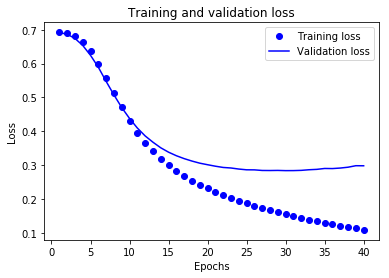

In [30]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

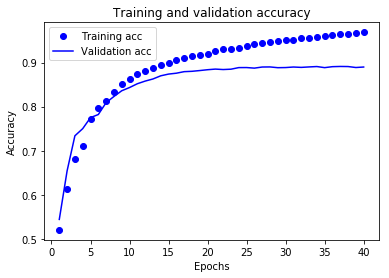

In [31]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()